In [1]:
import os
import numpy as np
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(fig, save_file):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
df = pd.read_excel("../data/avengeme_results.xlsx", sheet_name=1).loc[4:, :]

In [4]:
df = df.rename(columns={"Unnamed: 0": "Power"})

In [5]:
df = df.melt(id_vars=["Power"], value_vars=["Intelligence", "Education", "Schizophrenia", "Autism"], var_name="Phenotype", value_name="Samples")

In [6]:
plot_df = df.loc[df.Power.isin([0.11, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])]

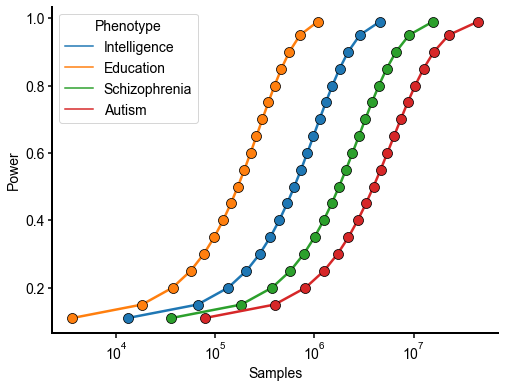

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,6))


sns.lineplot(
    data=plot_df,
    x="Samples",
    y="Power",
    hue="Phenotype",
    marker="o",
    markeredgecolor="k",
    markersize=10,
    linewidth=2.5,
    ax=ax
)



ax.spines[['right', 'top']].set_visible(False)
# ax.set_xticks(range(0, 10), range(1, 11))
ax.set_xlabel("Samples")
ax.set_ylabel("Power")
ax.set_xscale("symlog")

In [8]:
save_file = "../data/figures/avengeme.pdf"
save_pdf(fig, save_file)